K Means Clustering Implementation

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=50)

In [9]:
X.shape

(1000, 2)

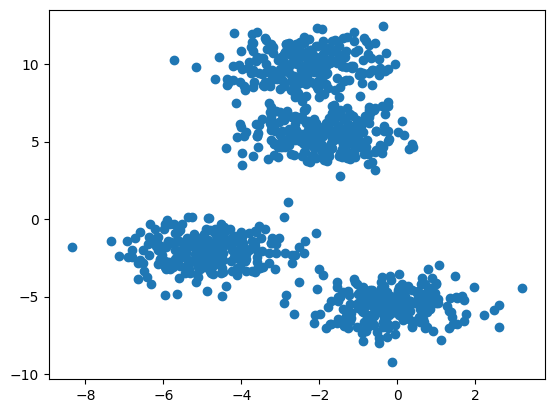

In [10]:
plt.scatter(X[:,0],X[:,1])
# creates a scatter plot using the first column of the array X for the x-axis values and the second column of the array X for the y-axis values.

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

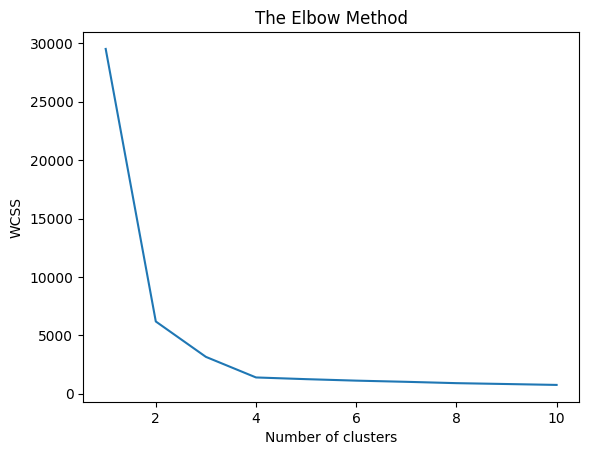

In [12]:
#Manual Process
#Elbow method to select K value
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [14]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


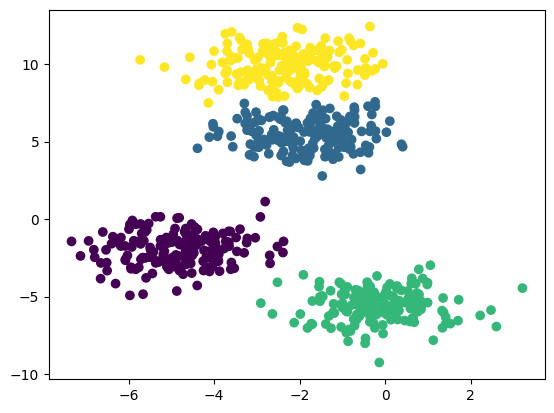

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_kmeans)

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

2

In [18]:
#performance metrics
#silhoutte score
from sklearn.metrics import silhouette_score

In [19]:
silhoutte_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhoutte_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [20]:
silhoutte_coefficients

[0.6878134472879786,
 0.6843074361080823,
 0.6533853971673632,
 0.5714046243208876,
 0.48169393187961207,
 0.3799434377040573,
 0.3306475292179651,
 0.32982196559917754,
 0.33769019366626574]

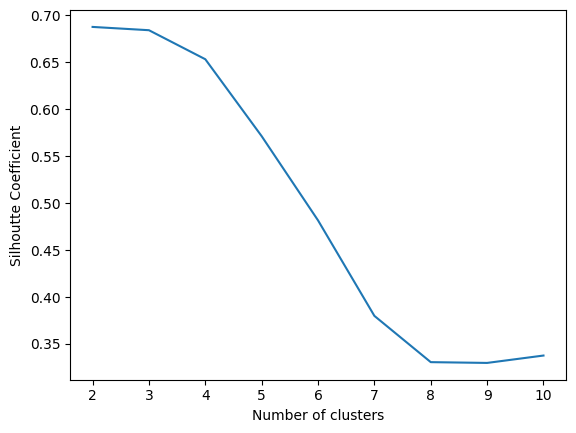

In [23]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.show()

Hierarchical Clustering Implementation

In [25]:
from sklearn import datasets

In [26]:
iris_data=datasets.load_iris()

In [27]:
iris_data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

In [28]:
iris_data_columns=iris_data.columns
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(iris_data)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [30]:
X_scaled.shape

(150, 4)

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

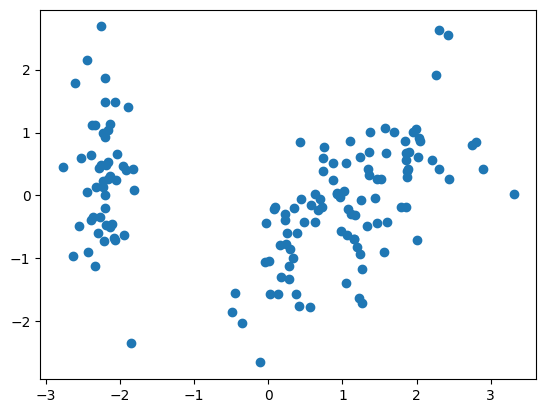

In [32]:
plt.scatter(X_pca[:,0],X_pca[:,1])

Text(0.5, 1.0, 'Dendrogram')

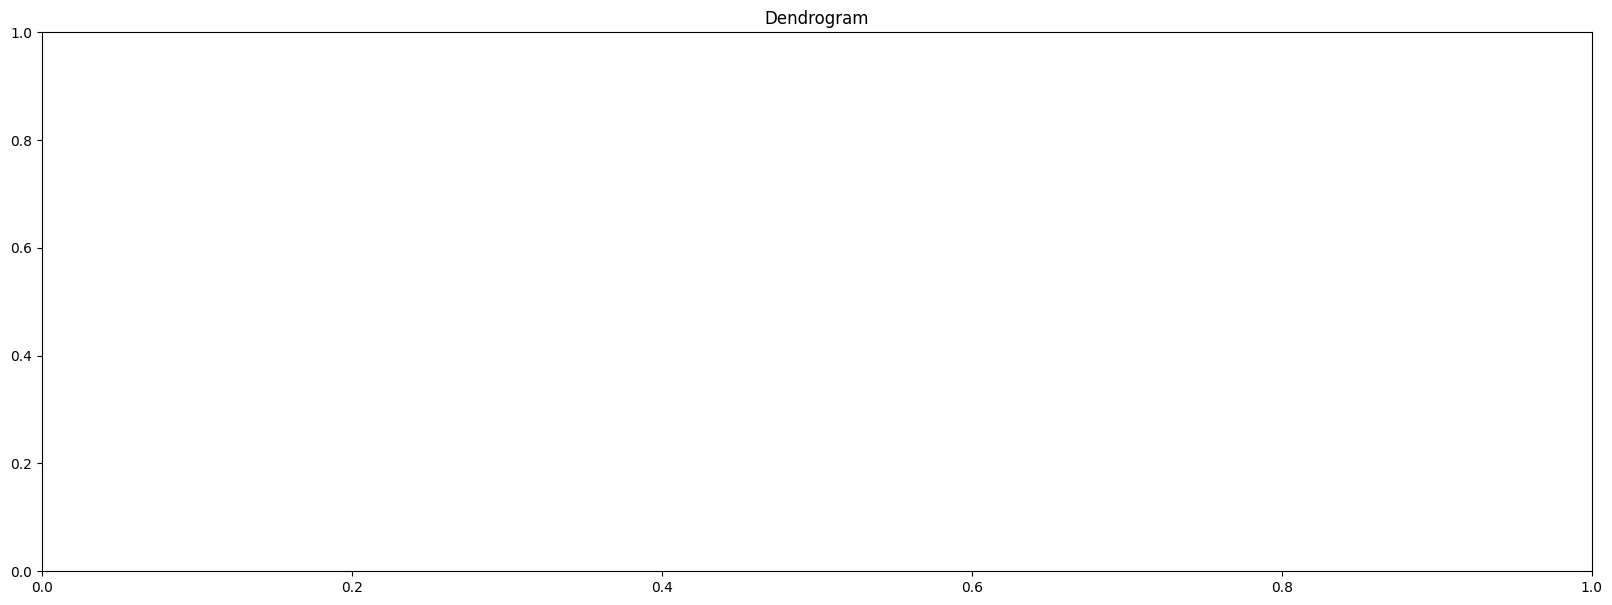

In [33]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
plt.title("Dendrogram")

<function matplotlib.pyplot.show(close=None, block=None)>

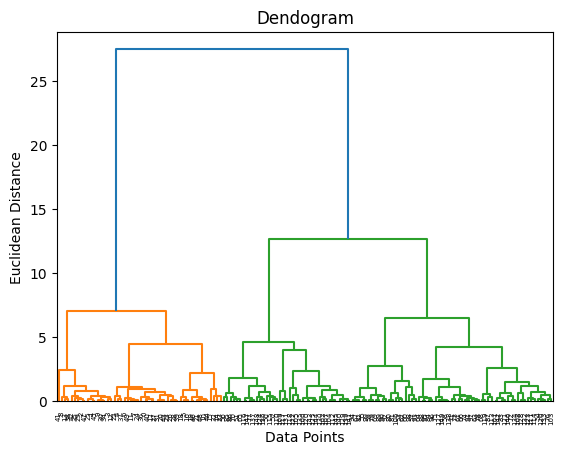

In [34]:
sch.dendrogram(sch.linkage(X_pca,method='ward'))
plt.title("Dendogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [37]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

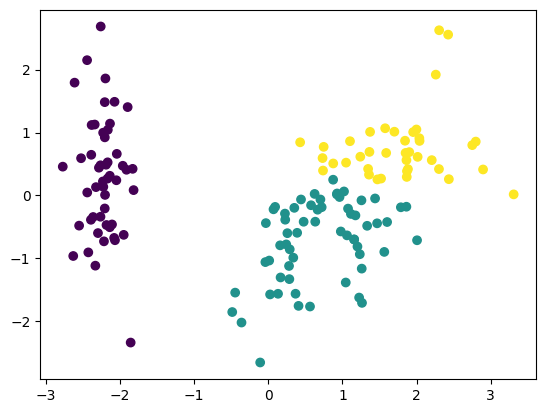

In [38]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster.labels_)

In [39]:
from sklearn.metrics import silhouette_score


In [40]:
silhoutte_coefficients=[]
for k in range(2,11):
  agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
  agglo.fit(X_pca)
  score=silhouette_score(X_pca,agglo.labels_)
  silhoutte_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

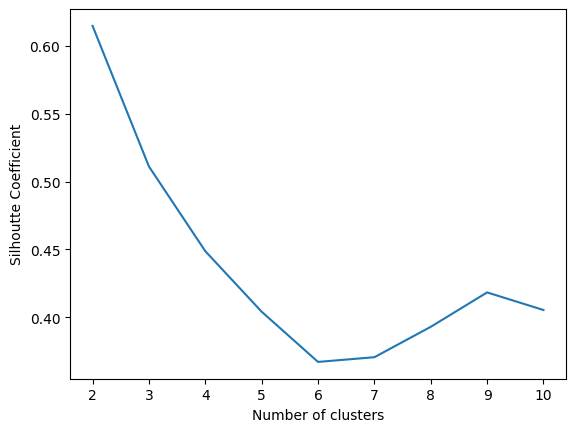

In [41]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.show()

DBSCAN clustering

In [48]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [44]:
X,y=make_moons(n_samples=250,noise=0.05)
X

array([[-4.89376340e-01,  8.37079665e-01],
       [ 1.46379247e+00, -3.90244472e-01],
       [ 6.79469648e-01, -3.80290234e-01],
       [ 1.82768439e-01,  9.84175996e-01],
       [ 9.46977991e-01,  2.93104956e-01],
       [ 2.04612102e+00,  2.70956866e-01],
       [-3.61107912e-02,  9.57906418e-01],
       [-7.81963125e-01,  6.00405914e-01],
       [ 9.07296622e-02, -6.33774922e-02],
       [ 2.06998436e+00,  4.53216017e-01],
       [ 1.56843593e+00, -3.11398055e-01],
       [ 1.97215260e+00,  4.34268907e-01],
       [-9.48703219e-01,  4.71046146e-01],
       [ 7.67599840e-01, -5.52000621e-01],
       [-8.07560148e-01,  6.20035763e-01],
       [ 1.38369263e+00, -4.02352844e-01],
       [ 6.72408021e-01,  6.75052265e-01],
       [ 1.12564539e-01,  9.83220351e-01],
       [-4.23072415e-01,  9.41002227e-01],
       [ 7.26215882e-01, -4.45782514e-01],
       [-7.71921170e-01,  7.45259582e-01],
       [ 8.88910449e-01,  1.94401690e-01],
       [ 6.84527776e-02,  1.00760218e+00],
       [ 4.

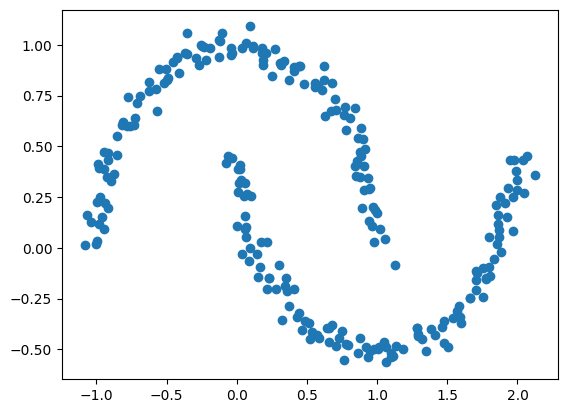

In [45]:
plt.scatter(X[:,0],X[:,1])

In [46]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_scaled

array([[-1.14148576,  1.19137362],
       [ 1.11481412, -1.28746344],
       [ 0.20876469, -1.26735878],
       [-0.36502436,  1.48846533],
       [ 0.51779023,  0.09270325],
       [ 1.78751984,  0.04797056],
       [-0.61787356,  1.43540844],
       [-1.4794819 ,  0.71336162],
       [-0.47134752, -0.6272874 ],
       [ 1.81508677,  0.41608092],
       [ 1.2356982 , -1.12821665],
       [ 1.70207155,  0.37781328],
       [-1.6721    ,  0.45209259],
       [ 0.31057265, -1.61416372],
       [-1.50905157,  0.75300819],
       [ 1.02228282, -1.31191882],
       [ 0.2006071 ,  0.86412549],
       [-0.44612388,  1.48653521],
       [-1.06489149,  1.4012669 ],
       [ 0.26276592, -1.3996341 ],
       [-1.46788144,  1.00592381],
       [ 0.45071063, -0.10664858],
       [-0.49708177,  1.5357794 ],
       [-0.10516965,  1.29682866],
       [ 0.23572828,  0.98434602],
       [ 0.32369317, -1.45301427],
       [ 0.90881655, -1.29259428],
       [ 1.55656444, -0.07447438],
       [ 1.88220376,

In [49]:
dbscan=DBSCAN(eps=0.5)
dbscan.fit(X_scaled)

DBSCAN()

In [50]:
dbscan.labels_

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0])

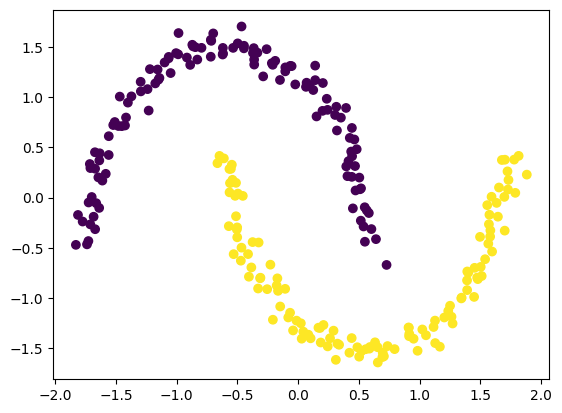

In [51]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbscan.labels_)